# Texto en Tablas

Por **Daniela Opitz & Eduardo Graells**. <dopitz@udd.cl>.

Actualizado: **28 de mayo de 2024**.

En este notebook exploraremos algunas visualizaciones donde el texto es protagonista a través del dataset [guaguas](https://github.com/rivaquiroga/guaguas) preparado por [Riva Quiroga](https://twitter.com/rivaquiroga). Algunos de los análisis están inspirados en los ejemplos que ella incluyó en el repositorio de guaguas.


## Google Colab

Para ejecutar este notebook en Colab, primero ejecuten la siguiente celda. Luego el notebook se reiniciará.

In [3]:
try:
    import google.colab
    !curl -L -o 'guaguas.csv.zip' 'https://www.dropbox.com/s/2xmwsa42j5xqugx/guaguas.csv.zip?st=40nj31ct&dl=0'
    !unzip 'guaguas.csv.zip'
    !curl -L -O https://github.com/daniopitz/visualizacion/raw/main/clases_practicas/miniaves.py
except:
    pass


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   148    0   148    0     0    258      0 --:--:-- --:--:-- --:--:--   259
100    17    0    17    0     0     16      0 --:--:--  0:00:01 --:--:--     0
100   491    0   491    0     0    280      0 --:--:--  0:00:01 --:--:--   280
100 3135k  100 3135k    0     0  1462k      0  0:00:02  0:00:02 --:--:-- 70.8M
Archive:  guaguas.csv.zip
  inflating: 1920-2020.csv           
  inflating: __MACOSX/._1920-2020.csv  
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 29450  100 29450    0     0  18448      0  0:00:01  0:00:01 --:--:--  638k


In [4]:
try:
    import google.colab
    !curl -L -o Fira_Sans_Extra_Condensed.zip 'https://www.dropbox.com/s/82nuhtpybfpjeq9/Fira_Sans_Extra_Condensed.zip?dl=1'
    !unzip -o Fira_Sans_Extra_Condensed.zip
    import matplotlib as mpl
    mpl.font_manager.fontManager.addfont('Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-Regular.ttf')
    #mpl.rc('font', family='Fira Sans Extra Condensed')
except:
    pass

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   146    0   146    0     0    413      0 --:--:-- --:--:-- --:--:--   413
100    17    0    17    0     0     23      0 --:--:-- --:--:-- --:--:--     0
100   496    0   496    0     0    370      0 --:--:--  0:00:01 --:--:--   370
100 3733k  100 3733k    0     0  1320k      0  0:00:02  0:00:02 --:--:-- 4242k
Archive:  Fira_Sans_Extra_Condensed.zip
   creating: Fira_Sans_Extra_Condensed/
  inflating: __MACOSX/._Fira_Sans_Extra_Condensed  
  inflating: Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-MediumItalic.ttf  
  inflating: __MACOSX/Fira_Sans_Extra_Condensed/._FiraSansExtraCondensed-MediumItalic.ttf  
  inflating: Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-Italic.ttf  
  inflating: __MACOSX/Fira_Sans_Extra_Condensed/._FiraSansExtraCondensed-Italic.ttf  
  inflating: Fira_Sans_Extra_Condensed/FiraSansExtraCondense

Una vez que se ha reiniciado puedes ejecutar el resto de las celdas.

## Preámbulo

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl

import seaborn as sns
sns.set_style('whitegrid')

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 150
# esto depende de las fuentes que tengas instaladas en el sistema.
mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"


#Carga y Preparación de Datos

In [6]:
# Leer el archivo CSV comprimido con gzip
guaguas = pd.read_csv('1920-2020.csv', sep=';', encoding='utf-8')
guaguas

anio     nombre sexo   n
0       1920      Aaron    M   1
1       1920   Abdolina    F   1
2       1920      Abdon    M   3
3       1920       Abel    M  11
4       1920   Abelardo    M  10
...      ...        ...  ...  ..
829245  2020       Zury    F   1
829246  2020  Zuryzaday    F   1
829247  2020    Zussany    F   1
829248  2020      Zuzel    F   1
829249  2020    Zyomara    F   1

[829250 rows x 4 columns]

Nuestro objetivo es agrupar los datos por la columna nombre, sumar los valores de n para cada grupo, y luego ordenar estos resultados de manera descendente para identificar cuáles grupos de nombres tienen los valores más altos.

In [7]:
total_n = guaguas.groupby('nombre')['n'].sum().sort_values(ascending=False)
total_n

nombre
Maria      973128
Jose       596119
Juan       580654
Luis       505375
Carlos     293381
            ...  
Idolive         1
Idolito         1
Idolida         1
Idolfio         1
Zysli           1
Name: n, Length: 186295, dtype: int64

Filtramos para mostrar sólo aquellos grupos cuya suma de n es mayor a 100.

In [8]:
total_n[total_n > 100]

nombre
Maria         973128
Jose          596119
Juan          580654
Luis          505375
Carlos        293381
               ...  
Camilla          101
Temistocle       101
Imelda           101
Nira             101
Fulvio           101
Name: n, Length: 4298, dtype: int64

Ahora transformamos la serie resultante en una tabla que sea fácil de analizar.

In [9]:
top_100=total_n[total_n > 100].index.tolist()
top_100

['Maria',
 'Jose',
 'Juan',
 'Luis',
 'Carlos',
 'Jorge',
 'Manuel',
 'Ana',
 'Rosa',
 'Francisco',
 'Victor',
 'Cristian',
 'Pedro',
 'Hector',
 'Sergio',
 'Sebastian',
 'Benjamin',
 'Miguel',
 'Matias',
 'Felipe',
 'Rodrigo',
 'Eduardo',
 'Patricia',
 'Claudia',
 'Carolina',
 'Camila',
 'Diego',
 'Patricio',
 'Nicolas',
 'Daniel',
 'Mario',
 'Catalina',
 'Claudio',
 'Pablo',
 'Javiera',
 'Ricardo',
 'Sofia',
 'Fernando',
 'Francisca',
 'Juana',
 'Daniela',
 'Constanza',
 'Oscar',
 'Valentina',
 'Jaime',
 'Alejandro',
 'Vicente',
 'Margarita',
 'Carmen',
 'Roberto',
 'Raul',
 'Javier',
 'Mauricio',
 'Martin',
 'Guillermo',
 'Marcelo',
 'Marcela',
 'Marta',
 'Gabriel',
 'Joaquin',
 'Sandra',
 'David',
 'Veronica',
 'Fernanda',
 'Julio',
 'Agustin',
 'Ignacio',
 'Cristobal',
 'Elizabeth',
 'Cecilia',
 'Tomas',
 'Marco',
 'Monica',
 'Alejandra',
 'Martina',
 'Hugo',
 'Isidora',
 'Teresa',
 'Andres',
 'Antonia',
 'Paola',
 'Cesar',
 'Emilia',
 'Silvia',
 'Maximiliano',
 'Gloria',
 'Isabel

In [10]:
# Filtrar las filas donde el nombre aparece más de 100 veces en el dataset 'guaguas'
guaguas_filtradas = guaguas[guaguas["nombre"].isin(top_100)]

# Agrupar los datos por 'anio' y 'nombre', y sumar la columna 'n' para cada grupo
grupo_anual = guaguas_filtradas.groupby(["anio", "nombre"])["n"].sum()

# Transformar la serie en una tabla, rellenando los valores faltantes con 0
tabla_anual = grupo_anual.unstack(fill_value=0)

# Mostrar la tabla resultante
tabla_anual


nombre  Aaron  Abby  Abdias  Abdiel  Abdon  Abel  Abelardo  Abelina  Abelino  \
anio                                                                           
1920        1     0       0       0      3    11        10        2        3   
1921        0     0       1       1      3    44        18        9        5   
1922        0     0       1       0     12    45        28        8        7   
1923        0     0       1       0      8    34        27       11        4   
1924        2     0       0       0      7    40        29        6       11   
...       ...   ...     ...     ...    ...   ...       ...      ...      ...   
2016      463    36      12      45      1    28         0        0        0   
2017      421    52      16      58      3    31         0        0        0   
2018      382    48       8      64      2    36         0        0        0   
2019      380    45      17     117      2    58         2        0        0   
2020      347    70      11     110      0    45         0        0        1   

nombre  Abercio  ...  Zocimo  Zoe  Zoila  Zoilo  Zoraida  Zorka  Zorobabel  \
anio             ...                                                         
1920          0  ...       3    1     31      2        6      1          2   
1921          1  ...       1    0     90      3        4      0          0   
1922          2  ...       1    1     77      6        7      1          1   
1923          2  ...       2    0     84      5       11      0          1   
1924          1  ...       1    0     94      5        2      0          2   
...         ...  ...     ...  ...    ...    ...      ...    ...        ...   
2016          0  ...       0  116      0      0        0      0          0   
2017          0  ...       0  107      0      0        0      0          0   
2018          0  ...       0  108      1      0        0      0          0   
2019          0  ...       0  144      0      0        0      0          1   
2020          0  ...       0  240      0      0        0      0          0   

nombre  Zudelia  Zulema  Zunilda  
anio                              
1920          1      17       19  
1921          1      59       42  
1922          2      62       37  
1923          1      68       53  
1924          2      61       61  
...         ...     ...      ...  
2016          0       1        0  
2017          0       3        0  
2018          0       3        1  
2019          0       3        0  
2020          0      11        0  

[101 rows x 4298 columns]

Como la población cambia cada año vamos a  normalizar las filas de la tabla tabla_anual y luego visualizar las columnas correspondientes a "Salvador" y "Augusto" para analizar su distribución de frecuencias relativa.

In [11]:
def normalize_rows(df):
    return df.div(df.sum(axis=1), axis=0)


In [12]:
tabla_anual.pipe(normalize_rows)

nombre     Aaron      Abby    Abdias    Abdiel     Abdon      Abel  Abelardo  \
anio                                                                           
1920    0.000051  0.000000  0.000000  0.000000  0.000153  0.000559  0.000509   
1921    0.000000  0.000000  0.000022  0.000022  0.000067  0.000987  0.000404   
1922    0.000000  0.000000  0.000021  0.000000  0.000256  0.000958  0.000596   
1923    0.000000  0.000000  0.000020  0.000000  0.000164  0.000695  0.000552   
1924    0.000037  0.000000  0.000000  0.000000  0.000131  0.000748  0.000542   
...          ...       ...       ...       ...       ...       ...       ...   
2016    0.002085  0.000162  0.000054  0.000203  0.000005  0.000126  0.000000   
2017    0.002034  0.000251  0.000077  0.000280  0.000014  0.000150  0.000000   
2018    0.001852  0.000233  0.000039  0.000310  0.000010  0.000175  0.000000   
2019    0.001944  0.000230  0.000087  0.000598  0.000010  0.000297  0.000010   
2020    0.001926  0.000389  0.000061  0.000611  0.000000  0.000250  0.000000   

nombre   Abelina   Abelino   Abercio  ...    Zocimo       Zoe     Zoila  \
anio                                  ...                                 
1920    0.000102  0.000153  0.000000  ...  0.000153  0.000051  0.001577   
1921    0.000202  0.000112  0.000022  ...  0.000022  0.000000  0.002018   
1922    0.000170  0.000149  0.000043  ...  0.000021  0.000021  0.001640   
1923    0.000225  0.000082  0.000041  ...  0.000041  0.000000  0.001718   
1924    0.000112  0.000206  0.000019  ...  0.000019  0.000000  0.001758   
...          ...       ...       ...  ...       ...       ...       ...   
2016    0.000000  0.000000  0.000000  ...  0.000000  0.000522  0.000000   
2017    0.000000  0.000000  0.000000  ...  0.000000  0.000517  0.000000   
2018    0.000000  0.000000  0.000000  ...  0.000000  0.000524  0.000005   
2019    0.000000  0.000000  0.000000  ...  0.000000  0.000737  0.000000   
2020    0.000000  0.000006  0.000000  ...  0.000000  0.001332  0.000000   

nombre     Zoilo   Zoraida     Zorka  Zorobabel   Zudelia    Zulema   Zunilda  
anio                                                                           
1920    0.000102  0.000305  0.000051   0.000102  0.000051  0.000865  0.000966  
1921    0.000067  0.000090  0.000000   0.000000  0.000022  0.001323  0.000942  
1922    0.000128  0.000149  0.000021   0.000021  0.000043  0.001320  0.000788  
1923    0.000102  0.000225  0.000000   0.000020  0.000020  0.001391  0.001084  
1924    0.000093  0.000037  0.000000   0.000037  0.000037  0.001141  0.001141  
...          ...       ...       ...        ...       ...       ...       ...  
2016    0.000000  0.000000  0.000000   0.000000  0.000000  0.000005  0.000000  
2017    0.000000  0.000000  0.000000   0.000000  0.000000  0.000014  0.000000  
2018    0.000000  0.000000  0.000000   0.000000  0.000000  0.000015  0.000005  
2019    0.000000  0.000000  0.000000   0.000005  0.000000  0.000015  0.000000  
2020    0.000000  0.000000  0.000000   0.000000  0.000000  0.000061  0.000000  

[101 rows x 4298 columns]

In [13]:
tabla_anual_norm=tabla_anual.pipe(normalize_rows)
tabla_anual_norm

nombre     Aaron      Abby    Abdias    Abdiel     Abdon      Abel  Abelardo  \
anio                                                                           
1920    0.000051  0.000000  0.000000  0.000000  0.000153  0.000559  0.000509   
1921    0.000000  0.000000  0.000022  0.000022  0.000067  0.000987  0.000404   
1922    0.000000  0.000000  0.000021  0.000000  0.000256  0.000958  0.000596   
1923    0.000000  0.000000  0.000020  0.000000  0.000164  0.000695  0.000552   
1924    0.000037  0.000000  0.000000  0.000000  0.000131  0.000748  0.000542   
...          ...       ...       ...       ...       ...       ...       ...   
2016    0.002085  0.000162  0.000054  0.000203  0.000005  0.000126  0.000000   
2017    0.002034  0.000251  0.000077  0.000280  0.000014  0.000150  0.000000   
2018    0.001852  0.000233  0.000039  0.000310  0.000010  0.000175  0.000000   
2019    0.001944  0.000230  0.000087  0.000598  0.000010  0.000297  0.000010   
2020    0.001926  0.000389  0.000061  0.000611  0.000000  0.000250  0.000000   

nombre   Abelina   Abelino   Abercio  ...    Zocimo       Zoe     Zoila  \
anio                                  ...                                 
1920    0.000102  0.000153  0.000000  ...  0.000153  0.000051  0.001577   
1921    0.000202  0.000112  0.000022  ...  0.000022  0.000000  0.002018   
1922    0.000170  0.000149  0.000043  ...  0.000021  0.000021  0.001640   
1923    0.000225  0.000082  0.000041  ...  0.000041  0.000000  0.001718   
1924    0.000112  0.000206  0.000019  ...  0.000019  0.000000  0.001758   
...          ...       ...       ...  ...       ...       ...       ...   
2016    0.000000  0.000000  0.000000  ...  0.000000  0.000522  0.000000   
2017    0.000000  0.000000  0.000000  ...  0.000000  0.000517  0.000000   
2018    0.000000  0.000000  0.000000  ...  0.000000  0.000524  0.000005   
2019    0.000000  0.000000  0.000000  ...  0.000000  0.000737  0.000000   
2020    0.000000  0.000006  0.000000  ...  0.000000  0.001332  0.000000   

nombre     Zoilo   Zoraida     Zorka  Zorobabel   Zudelia    Zulema   Zunilda  
anio                                                                           
1920    0.000102  0.000305  0.000051   0.000102  0.000051  0.000865  0.000966  
1921    0.000067  0.000090  0.000000   0.000000  0.000022  0.001323  0.000942  
1922    0.000128  0.000149  0.000021   0.000021  0.000043  0.001320  0.000788  
1923    0.000102  0.000225  0.000000   0.000020  0.000020  0.001391  0.001084  
1924    0.000093  0.000037  0.000000   0.000037  0.000037  0.001141  0.001141  
...          ...       ...       ...        ...       ...       ...       ...  
2016    0.000000  0.000000  0.000000   0.000000  0.000000  0.000005  0.000000  
2017    0.000000  0.000000  0.000000   0.000000  0.000000  0.000014  0.000000  
2018    0.000000  0.000000  0.000000   0.000000  0.000000  0.000015  0.000005  
2019    0.000000  0.000000  0.000000   0.000005  0.000000  0.000015  0.000000  
2020    0.000000  0.000000  0.000000   0.000000  0.000000  0.000061  0.000000  

[101 rows x 4298 columns]

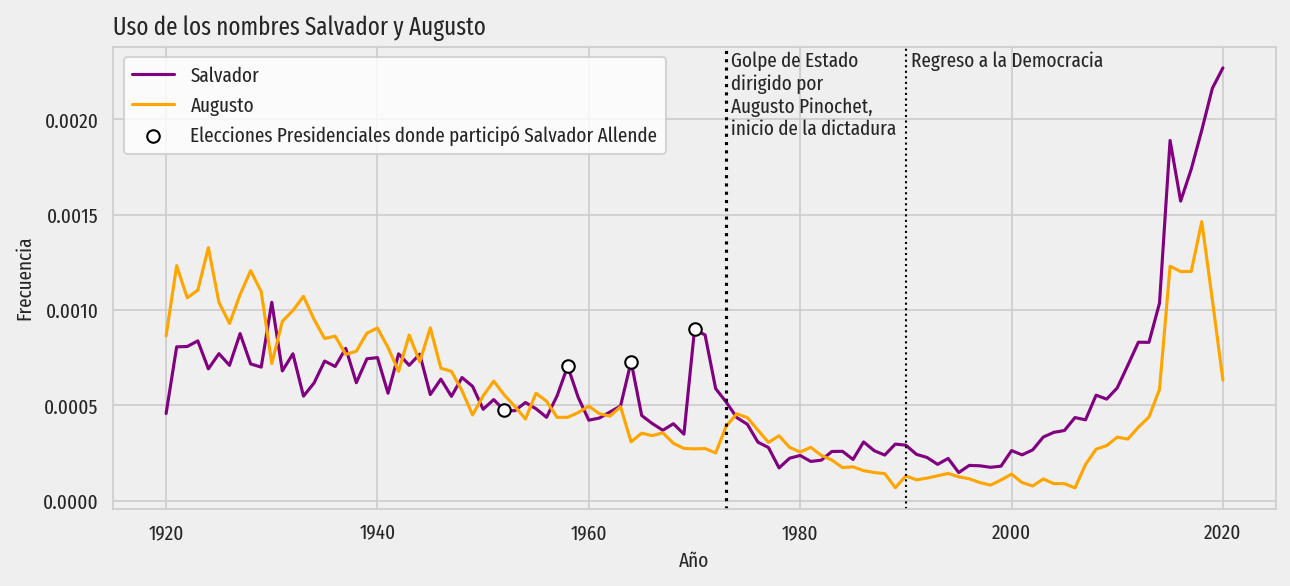

In [14]:
# Filtrar los datos para los nombres "Salvador" y "Augusto"
nombres_a_comparar = ["Salvador", "Augusto"]
datos_filtrados = tabla_anual_norm[nombres_a_comparar]

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 4))

# Establecer el color de fondo
fig.patch.set_facecolor('#efefef')
ax.set_facecolor('#efefef')

# Graficar los datos para "Salvador"
ax.plot(datos_filtrados.index, datos_filtrados["Salvador"], label="Salvador", color="purple")

# Graficar los datos para "Augusto"
ax.plot(datos_filtrados.index, datos_filtrados["Augusto"], label="Augusto", color="orange")

# Añadir una línea vertical en el año 1973
ax.axvline(x=1973, color='black', linestyle='dotted')

ax.annotate("Golpe de Estado\ndirigido por\nAugusto Pinochet,\ninicio de la dictadura",
    xy=(1973.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top")

# Añadir una línea vertical en el año 1990
ax.axvline(1990, linestyle="dotted", linewidth=1, color="black")

ax.annotate("Regreso a la Democracia",
    xy=(1990.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top")

# Añadir puntos de dispersión para las elecciones presidenciales en las que participó Salvador Allende
elecciones_allende = [1952, 1958, 1964, 1970]
ax.scatter(
    elecciones_allende,
    datos_filtrados.loc[elecciones_allende, "Salvador"],
    color="white",
    edgecolor="black",
    label="Elecciones Presidenciales donde participó Salvador Allende",
    zorder=5,
)


# Configurar etiquetas y título del gráfico
ax.set_xlabel("Año")
ax.set_ylabel("Frecuencia")
ax.set_title("Uso de los nombres Salvador y Augusto", loc="left")


# Añadir leyenda
ax.legend()



¿Cómo se ve si graficamos los totales?

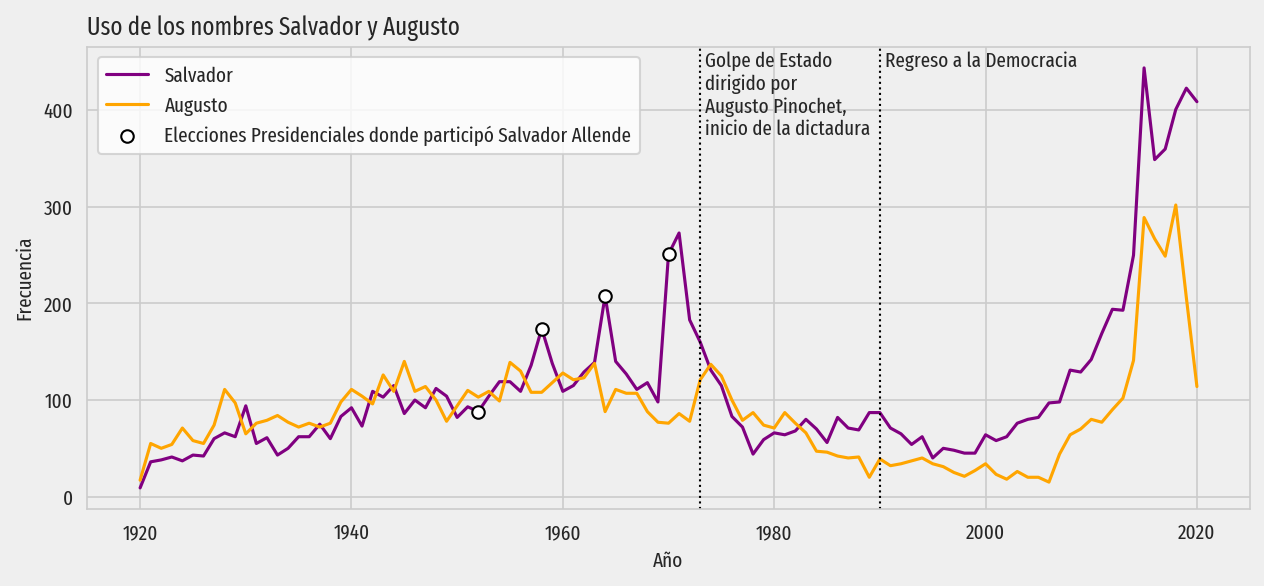

In [15]:
# Filtrar los datos para los nombres "Salvador" y "Augusto"
nombres_a_comparar = ["Salvador", "Augusto"]
datos_filtrados = tabla_anual[nombres_a_comparar]

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 4))

# Establecer el color de fondo
fig.patch.set_facecolor('#efefef')
ax.set_facecolor('#efefef')

# Graficar los datos para "Salvador"
ax.plot(datos_filtrados.index, datos_filtrados["Salvador"], label="Salvador", color="purple")

# Graficar los datos para "Augusto"
ax.plot(datos_filtrados.index, datos_filtrados["Augusto"], label="Augusto", color="orange")

# Añadir líneas verticales para eventos importantes
ax.axvline(1973, linestyle="dotted", linewidth=1, color="black")
ax.annotate(
    "Golpe de Estado\ndirigido por\nAugusto Pinochet,\ninicio de la dictadura",
    xy=(1973.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top",
)

ax.axvline(1990, linestyle="dotted", linewidth=1, color="black")
ax.annotate(
    "Regreso a la Democracia",
    xy=(1990.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top",
)

# Añadir puntos de dispersión para las elecciones presidenciales en las que participó Salvador Allende
elecciones_allende = [1952, 1958, 1964, 1970]
ax.scatter(
    elecciones_allende,
    tabla_anual.loc[elecciones_allende, "Salvador"],
    color="white",
    edgecolor="black",
    label="Elecciones Presidenciales donde participó Salvador Allende",
    zorder=5,
)

# Configurar etiquetas y título del gráfico
ax.set_xlabel("Año")
ax.set_ylabel("Frecuencia")
ax.set_title("Uso de los nombres Salvador y Augusto", loc="left")


# Añadir leyenda
ax.legend()


# Stream Graph o Gráfico de Flujo

Un **streamgraph (o gráfico de flujo)** es un tipo de gráfico utilizado para mostrar la evolución de datos multivariados a lo largo del tiempo. Se caracteriza por sus formas suaves y apiladas, que parecen fluir en el tiempo, de ahí el nombre "stream" (corriente o flujo). Cada categoría de datos se representa como una banda de color, y el ancho de cada banda en cualquier punto en el tiempo refleja la magnitud de esa categoría.


El streamgraph consiste básicamente en un **stacked area chart** o **grafico de áreas** suavizado

## Areas Apiladas (Stacked Area Chart)

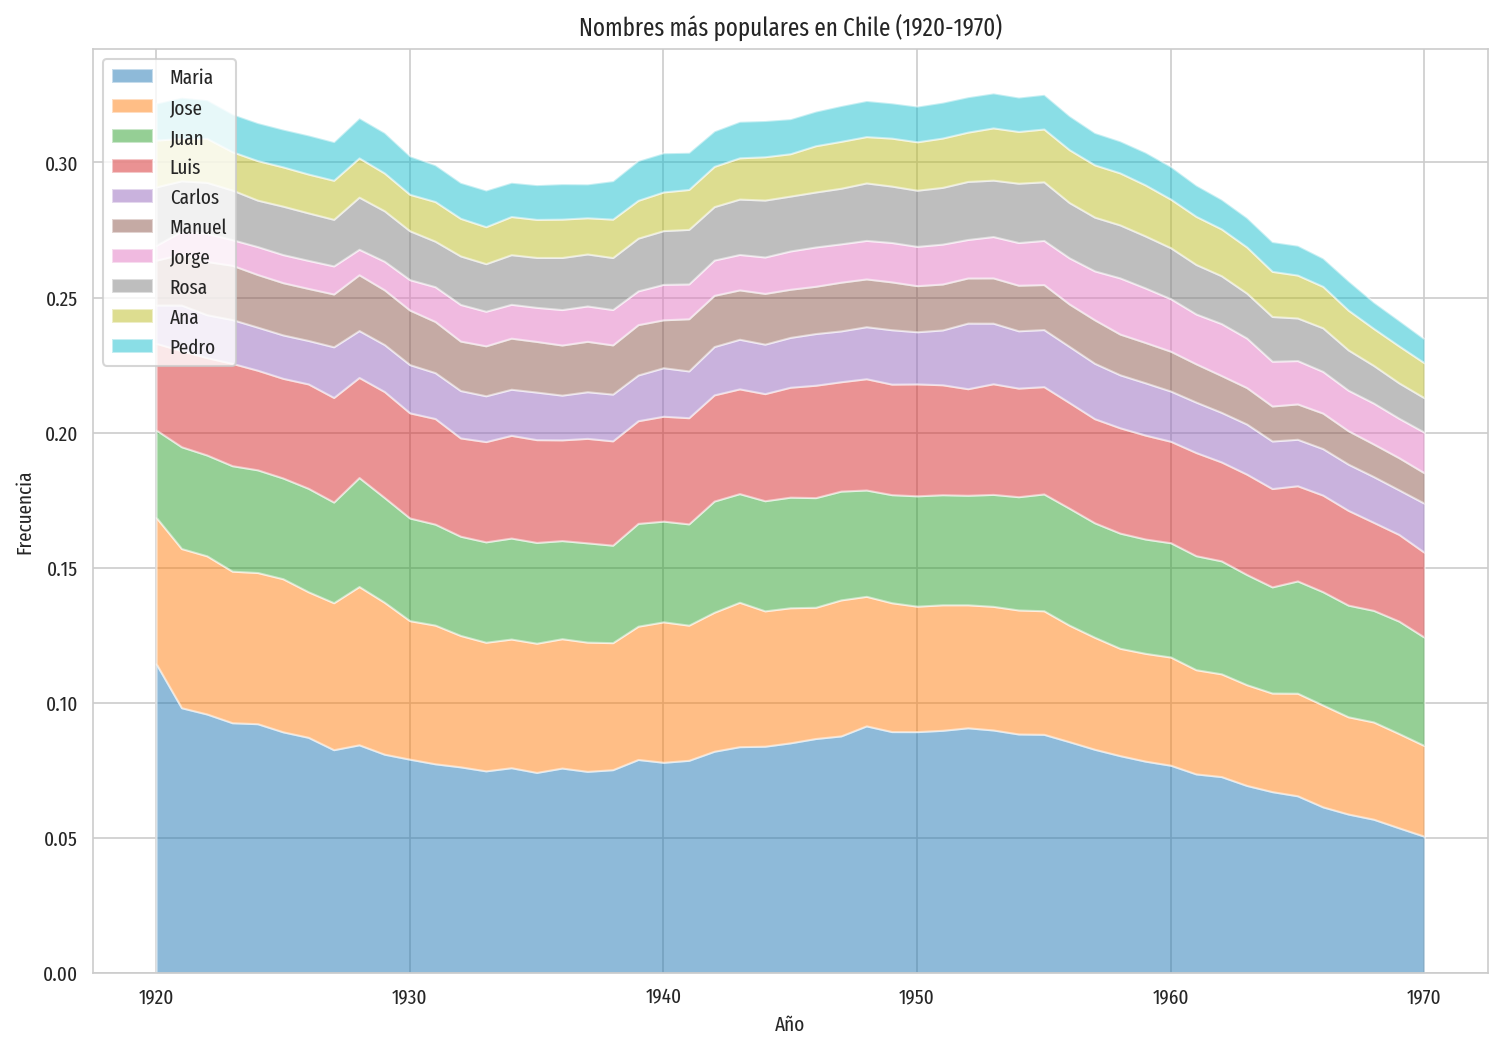

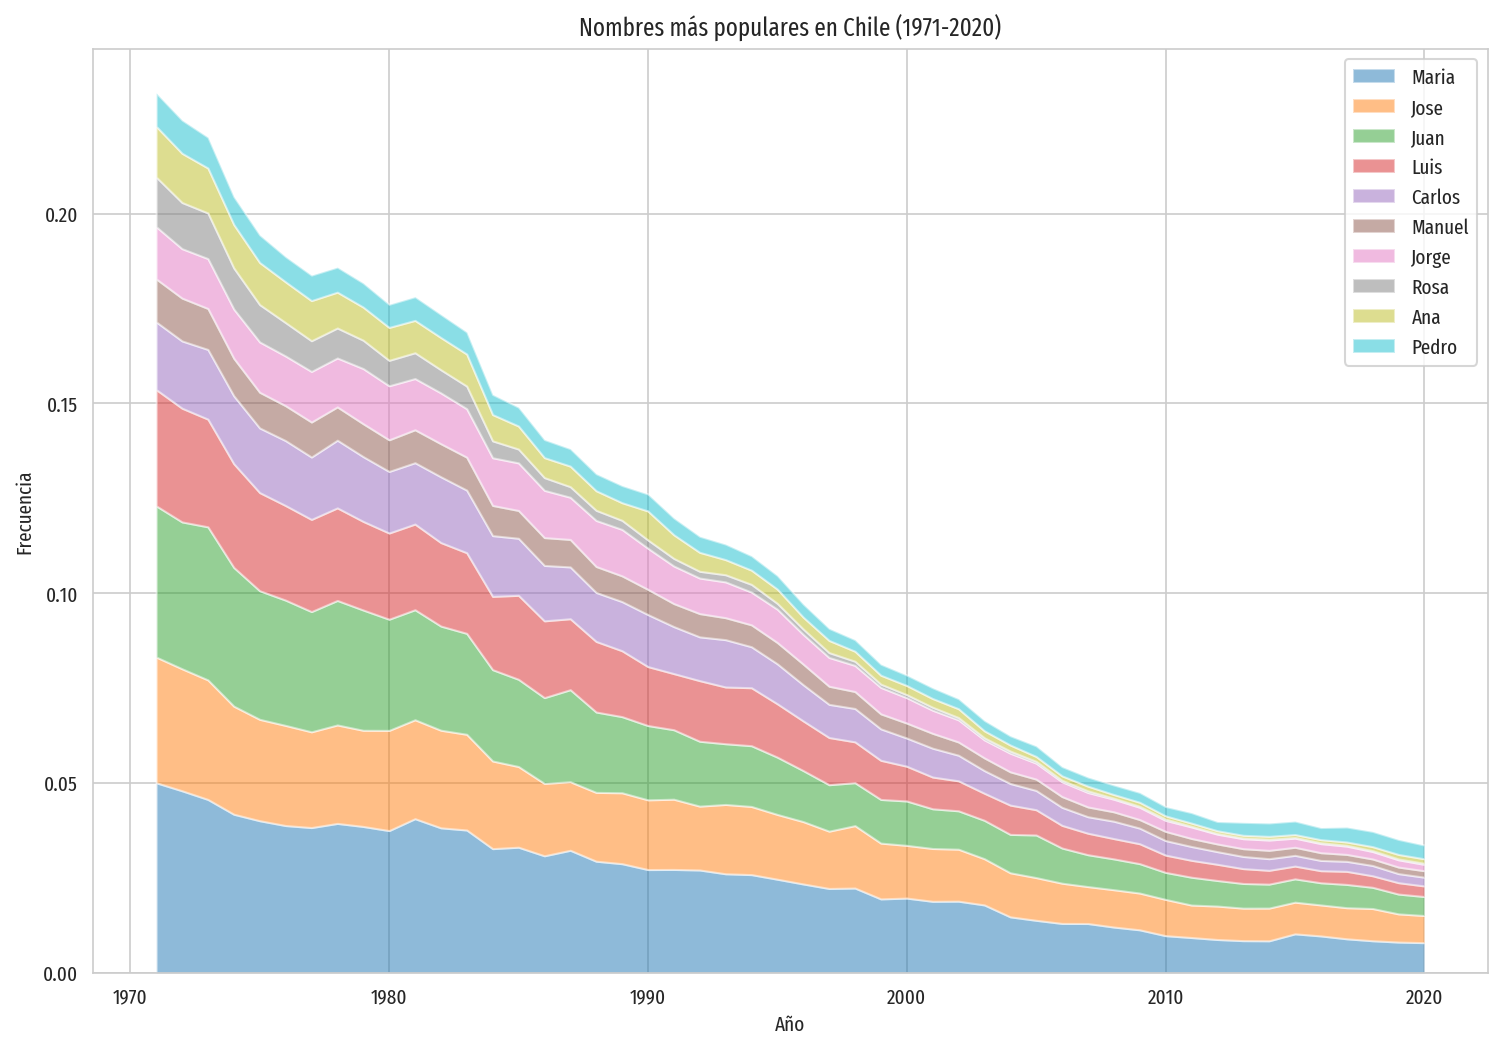

In [16]:
# Obtener los 10 nombres más populares
nombres_mas_populares = tabla_anual_norm.sum(axis=0).sort_values(ascending=False).head(10).index
datos_populares = tabla_anual_norm[nombres_mas_populares]

# Dividir los datos en dos períodos
datos_1920_1970 = datos_populares.loc[1920:1970]
datos_1971_2020 = datos_populares.loc[1971:]

# Función para crear un gráfico de áreas apiladas
def crear_stackplot(datos, title, legend_loc):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.stackplot(datos.index, datos.T, labels=datos.columns, alpha=0.5)
    ax.set_xlabel("Año")
    ax.set_ylabel("Frecuencia")
    ax.set_title(title)
    ax.legend(loc=legend_loc)
    plt.show()

# Crear el gráfico para 1920-1970
crear_stackplot(datos_1920_1970, "Nombres más populares en Chile (1920-1970)", 'upper left')

# Crear el gráfico para 1971-2020
crear_stackplot(datos_1971_2020, "Nombres más populares en Chile (1971-2020)", 'upper right')


## Stream Graph (Gráfico de Flujo)

Para crear un streamgraph, debemos ajustar la forma en que se apilan las áreas para que el eje x quede centrado en el gráfico. Este ajuste se realiza mediante el uso del parámetro **baseline="sym"** en la función ax.stackplot. El parámetro baseline="sym" redistribuye las áreas apiladas alrededor del eje x, colocándolo en el centro del gráfico y creando el efecto visual característico de un streamgraph. Esto ayuda a visualizar mejor las fluctuaciones de los datos y a equilibrar el gráfico en torno al eje horizontal.

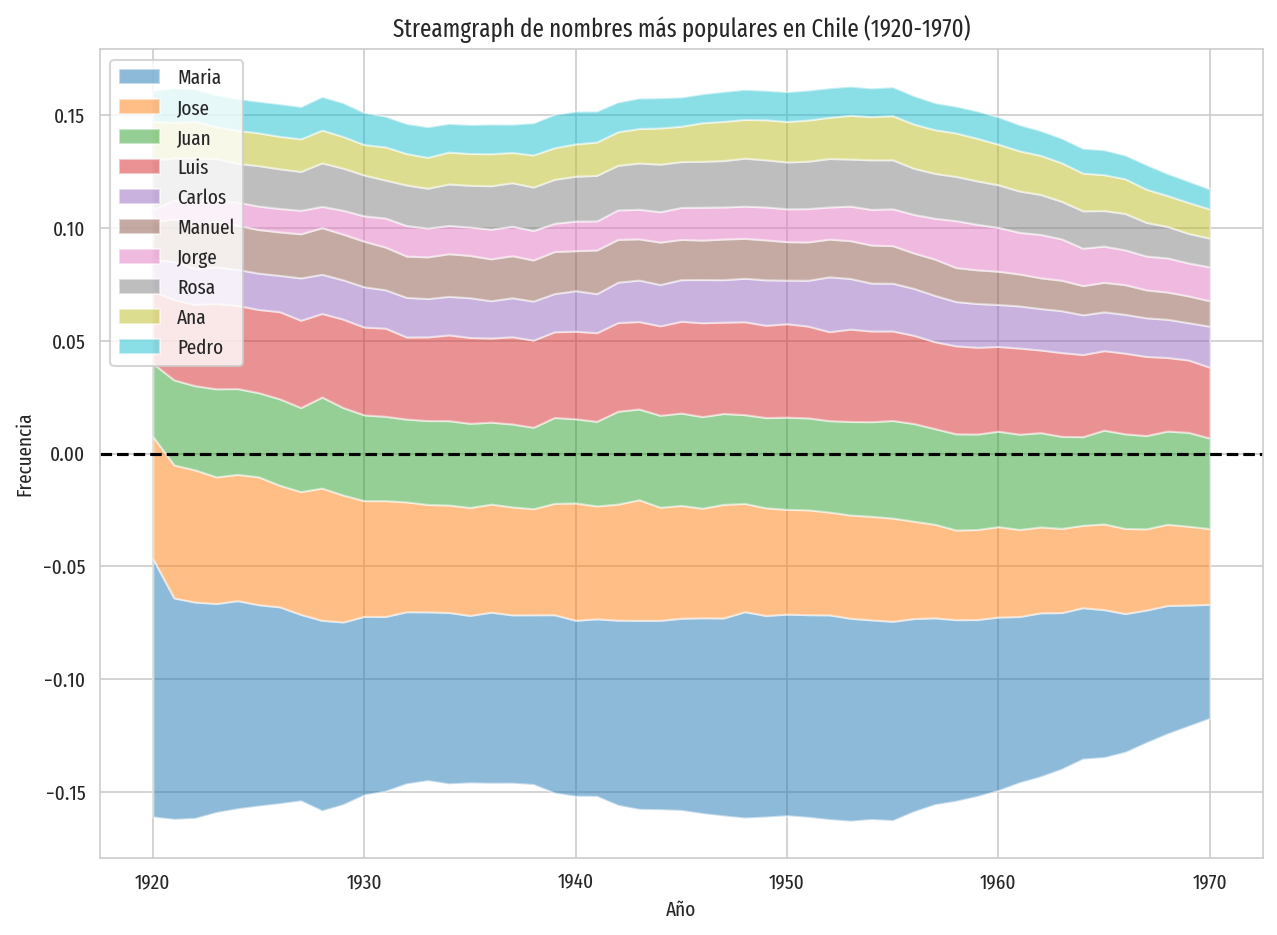

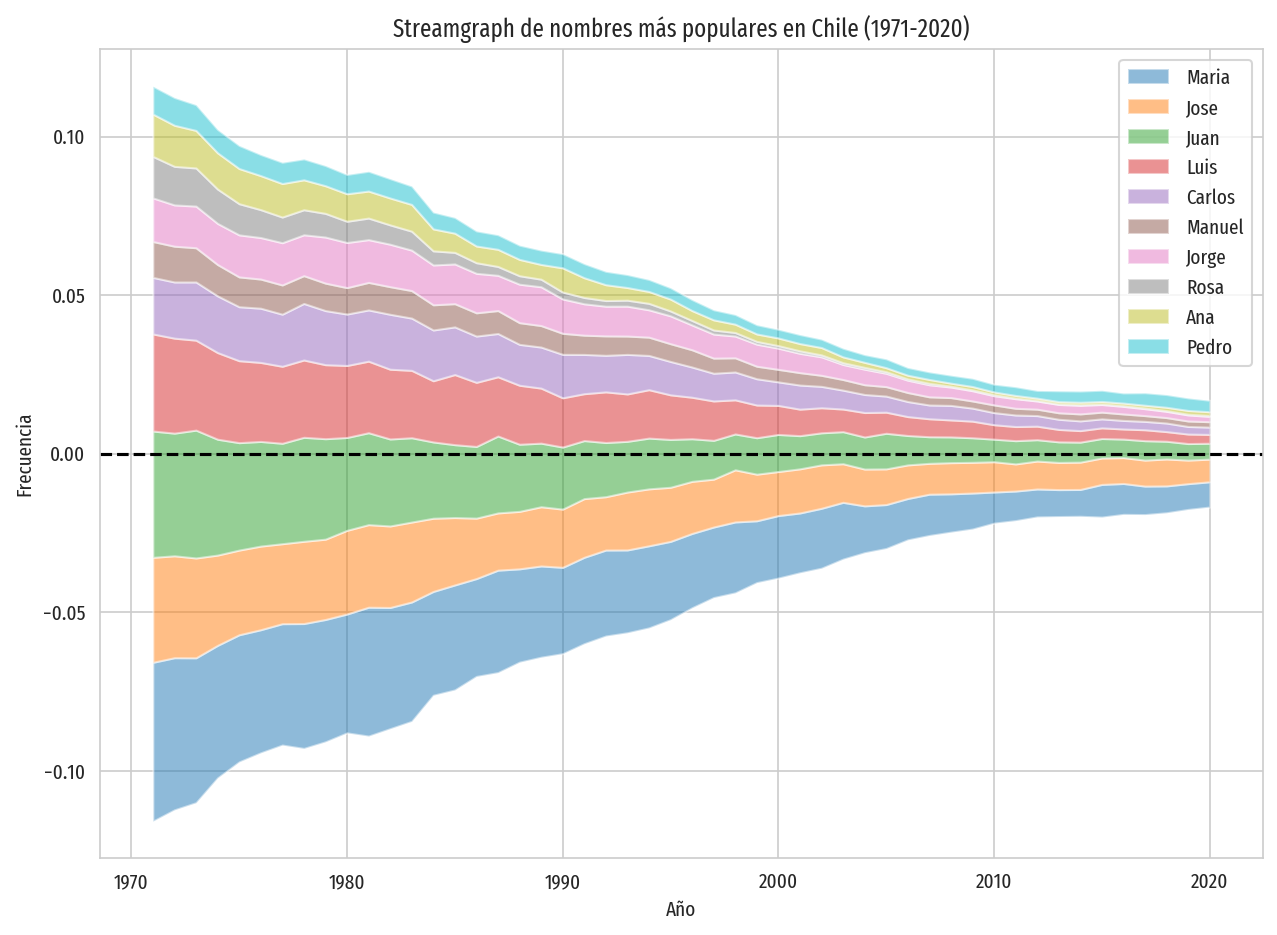

In [17]:
# Obtener los 10 nombres más populares
nombres_mas_populares = tabla_anual_norm.sum(axis=0).sort_values(ascending=False).head(10).index
datos_populares = tabla_anual_norm[nombres_mas_populares]

# Dividir los datos en dos períodos
datos_1920_1970 = datos_populares.loc[1920:1970]
datos_1971_2020 = datos_populares.loc[1971:]

# Función para crear un streamgraph
def crear_streamgraph(datos, title, legend_loc):
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.stackplot(datos.index, datos.T, labels=datos.columns, alpha=0.5, baseline="sym")
    ax.axhline(0, color="black", ls="--")
    ax.set_xlabel("Año")
    ax.set_ylabel("Frecuencia")
    ax.set_title(title)
    ax.legend(loc=legend_loc)
    plt.show()

# Crear el gráfico para 1920-1970
crear_streamgraph(datos_1920_1970, "Streamgraph de nombres más populares en Chile (1920-1970)", 'upper left')

# Crear el gráfico para 1971-2020
crear_streamgraph(datos_1971_2020, "Streamgraph de nombres más populares en Chile (1971-2020)", 'upper right')


El siguiente paso consiete en suaviazar las lineas de flujo. Esto lo logramos con **stats.norm.pdf.**



In [18]:
import numpy as np
from scipy import stats

Vamos a usar stats.norm.pdf(x, m, sd) para calcular la función de densidad de probabilidad (PDF) de una distribución normal con media m y desviación estándar sd para cada valor en x. Esto se hace para cada punto m en x, produciendo una matriz donde cada fila contiene los pesos gaussianos calculados para cada punto de x.

Un **peso gaussiano** es un valor que se calcula utilizando la función de densidad de probabilidad (PDF) **de una distribución normal (gaussiana)**. Se usa para dar más importancia (mayor peso) a los valores que están más cerca del punto central de la distribución y menos importancia (menor peso) a los valores que están más lejos. Esto es útil en técnicas de suavizado y filtrado para reducir el ruido en los datos y hacer que los valores resultantes sean más representativos del comportamiento subyacente de los datos.

In [19]:
def gaussian_smooth(x, y, sd):
    # Inicializar una lista para almacenar los pesos
    weights = []

    # Calcular los pesos gaussianos para cada punto
    for m in x:
        weight = stats.norm.pdf(x, m, sd)
        weights.append(weight)

    # Convertir la lista de pesos a un array numpy
    weights = np.array(weights)

    # Normalizar los pesos
    for i in range(weights.shape[0]):
        weights[i] = weights[i] / weights[i].sum()

    # Aplicar los pesos a los valores y y calcular la suma ponderada
    smoothed_y = np.zeros_like(y)
    for i in range(weights.shape[0]):
        smoothed_y[i] = np.sum(weights[i] * y)

    return smoothed_y


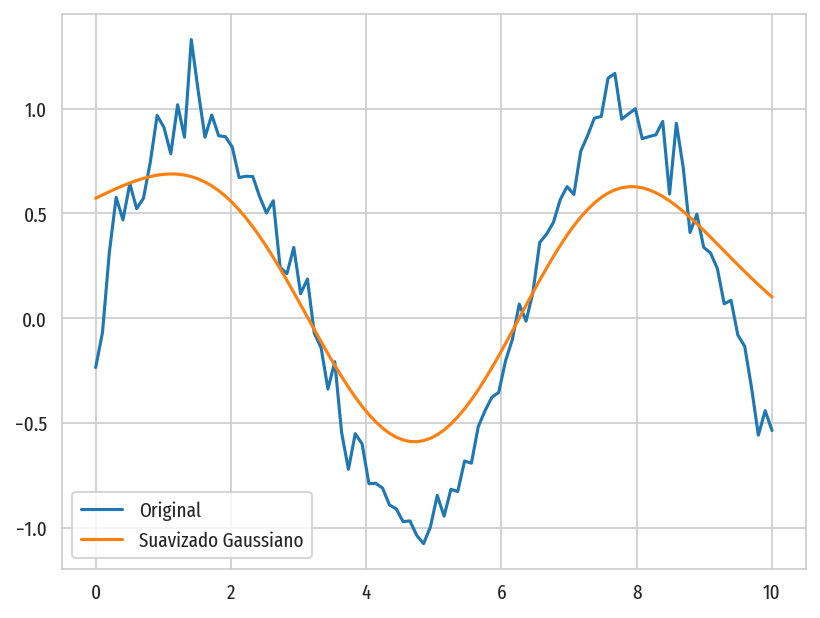

In [20]:
# Datos de ejemplo
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, x.size)

# Suavizado gaussiano
sd = 1
y_smooth = gaussian_smooth(x, y, sd)

# Gráfico
plt.plot(x, y, label='Original')
plt.plot(x, y_smooth, label='Suavizado Gaussiano')
plt.legend()
plt.show()

Ahora vamos a nuestro problema

In [21]:
tabla_anual_norm.head()

nombre     Aaron  Abby    Abdias    Abdiel     Abdon      Abel  Abelardo  \
anio                                                                       
1920    0.000051   0.0  0.000000  0.000000  0.000153  0.000559  0.000509   
1921    0.000000   0.0  0.000022  0.000022  0.000067  0.000987  0.000404   
1922    0.000000   0.0  0.000021  0.000000  0.000256  0.000958  0.000596   
1923    0.000000   0.0  0.000020  0.000000  0.000164  0.000695  0.000552   
1924    0.000037   0.0  0.000000  0.000000  0.000131  0.000748  0.000542   

nombre   Abelina   Abelino   Abercio  ...    Zocimo       Zoe     Zoila  \
anio                                  ...                                 
1920    0.000102  0.000153  0.000000  ...  0.000153  0.000051  0.001577   
1921    0.000202  0.000112  0.000022  ...  0.000022  0.000000  0.002018   
1922    0.000170  0.000149  0.000043  ...  0.000021  0.000021  0.001640   
1923    0.000225  0.000082  0.000041  ...  0.000041  0.000000  0.001718   
1924    0.000112  0.000206  0.000019  ...  0.000019  0.000000  0.001758   

nombre     Zoilo   Zoraida     Zorka  Zorobabel   Zudelia    Zulema   Zunilda  
anio                                                                           
1920    0.000102  0.000305  0.000051   0.000102  0.000051  0.000865  0.000966  
1921    0.000067  0.000090  0.000000   0.000000  0.000022  0.001323  0.000942  
1922    0.000128  0.000149  0.000021   0.000021  0.000043  0.001320  0.000788  
1923    0.000102  0.000225  0.000000   0.000020  0.000020  0.001391  0.001084  
1924    0.000093  0.000037  0.000000   0.000037  0.000037  0.001141  0.001141  

[5 rows x 4298 columns]

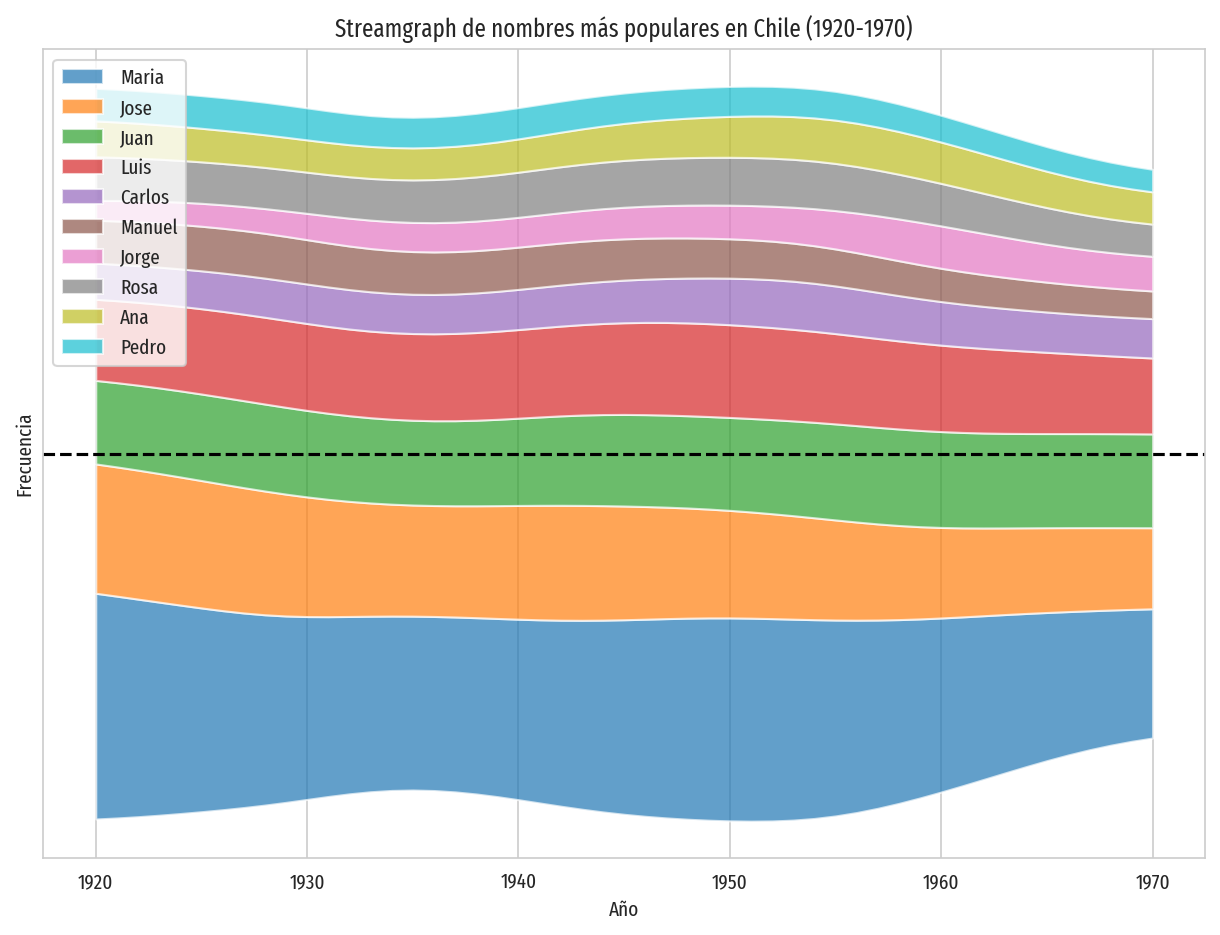

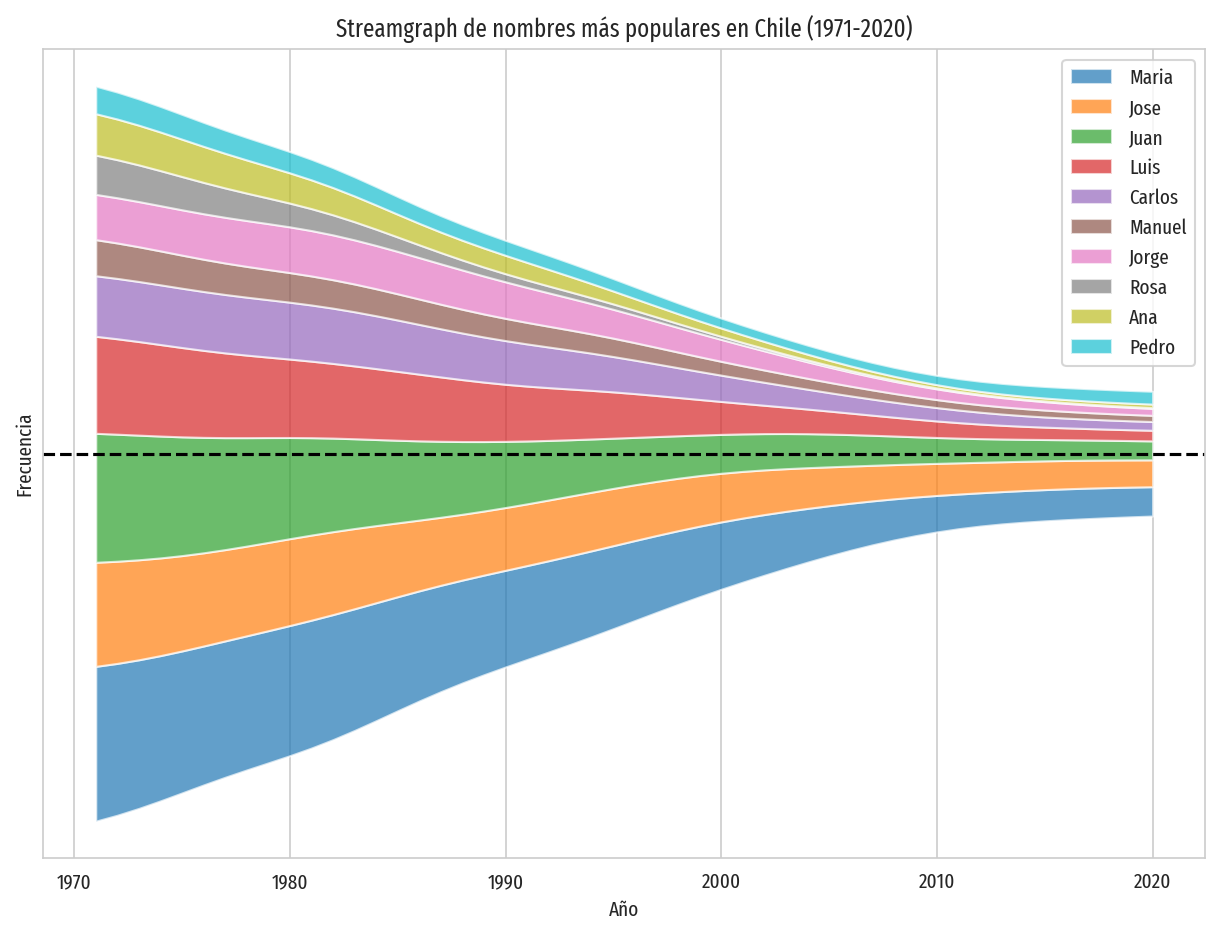

In [22]:
# Obtener los 10 nombres más populares
nombres_mas_populares = tabla_anual_norm.sum(axis=0).sort_values(ascending=False).head(10).index
datos_populares = tabla_anual_norm[nombres_mas_populares]

# Dividir los datos en dos períodos
datos_1920_1970 = datos_populares.loc[1920:1970]
datos_1971_2020 = datos_populares.loc[1971:]

# Aplicar suavizado a los datos
def aplicar_suavizado(datos, sd):
    datos_suavizados = datos.copy()
    for col in datos.columns:
        datos_suavizados[col] = gaussian_smooth(datos.index, datos[col].values, sd)
    return datos_suavizados

# Función para crear un streamgraph
def crear_streamgraph(datos, title, legend_loc, sd):
    datos_suavizados = aplicar_suavizado(datos, sd)
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.stackplot(datos_suavizados.index, datos_suavizados.T, labels=datos_suavizados.columns, alpha=0.7, baseline="sym")
    ax.axhline(0, color="black", ls="--")
    ax.set_xlabel("Año")
    ax.set_ylabel("Frecuencia")
    ax.set_title(title)
    ax.legend(loc=legend_loc)

    # Configurar el eje y para no mostrar los valores ni las etiquetas
    ax.yaxis.set_ticks([])
    ax.yaxis.set_ticklabels([])

    plt.show()

# Definir el desvío estándar para el suavizado
sd = 3

# Crear el gráfico para 1920-1970
crear_streamgraph(datos_1920_1970, "Streamgraph de nombres más populares en Chile (1920-1970)", 'upper left', sd)

# Crear el gráfico para 1971-2020
crear_streamgraph(datos_1971_2020, "Streamgraph de nombres más populares en Chile (1971-2020)", 'upper right', sd)


## Streamgraph para todos los años

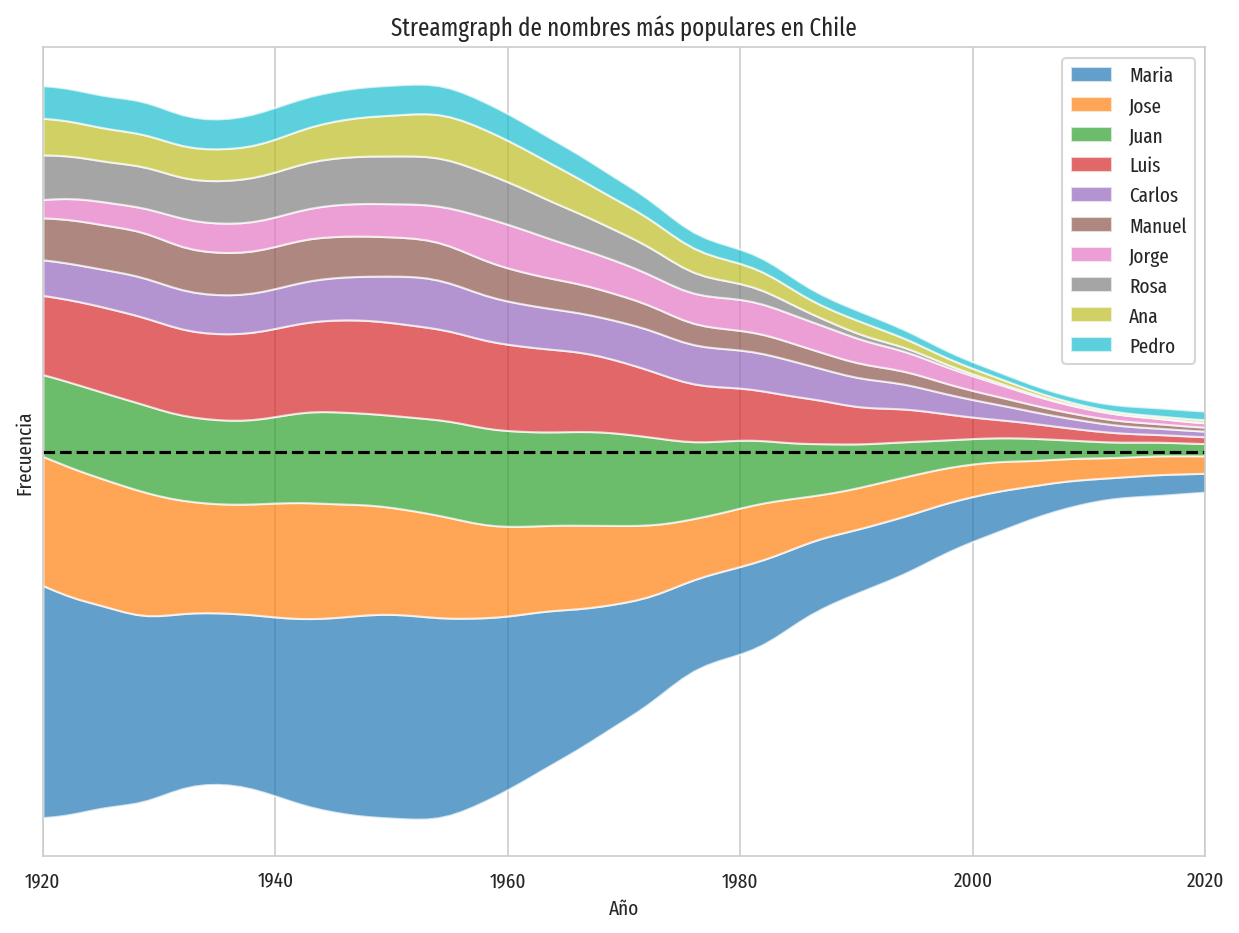

In [23]:
# Obtener los 10 nombres más populares
nombres_mas_populares = tabla_anual_norm.sum(axis=0).sort_values(ascending=False).head(10).index
datos_populares = tabla_anual_norm[nombres_mas_populares]

# Aplicar suavizado a los datos
def aplicar_suavizado(datos, sd):
    datos_suavizados = datos.copy()
    for col in datos.columns:
        datos_suavizados[col] = gaussian_smooth(datos.index, datos[col].values, sd)
    return datos_suavizados

# Función para crear un streamgraph
def crear_streamgraph(datos, title, legend_loc, sd):
    datos_suavizados = aplicar_suavizado(datos, sd)
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.stackplot(datos_suavizados.index, datos_suavizados.T, labels=datos_suavizados.columns, alpha=0.7, baseline="sym")
    ax.axhline(0, color="black", ls="--")
    ax.set_xlim(datos.index.min(), datos.index.max())  # Asegurar que se muestren todos los años
    ax.set_xlabel("Año")
    ax.set_ylabel("Frecuencia")
    ax.set_title(title)
    ax.legend(loc=legend_loc)


    # Configurar el eje y para no mostrar los valores ni las etiquetas
    ax.yaxis.set_ticks([])
    ax.yaxis.set_ticklabels([])

    plt.show()

# Definir el desvío estándar para el suavizado
sd = 2

# Crear el gráfico para todo el dataset
crear_streamgraph(datos_populares, "Streamgraph de nombres más populares en Chile", 'upper right', sd)


## Areas Apiladas por Sexo

In [24]:
# Paso 1: Agrupar por nombre y sexo, sumar las frecuencias y ordenar en orden descendente
name_sex_counts = guaguas.groupby(["nombre", "sexo"])["n"].sum().sort_values(ascending=False)

# Paso 2: Reiniciar el índice para convertir el índice multi-nivel en columnas
name_sex_counts = name_sex_counts.reset_index()

# Paso 3: Seleccionar los 10 nombres más populares para cada sexo
top_10_females = name_sex_counts[name_sex_counts['sexo'] == 'F'].head(10)
top_10_males = name_sex_counts[name_sex_counts['sexo'] == 'M'].head(10)

# Paso 4: Combinar los nombres más populares
top_names = pd.concat([top_10_females, top_10_males])['nombre']

# Paso 5: Filtrar los datos para incluir solo los nombres seleccionados
datos_populares = tabla_anual[top_names]

# Paso 6: Normalizar las filas para obtener proporciones
tabla_anual_normalizada = datos_populares.div(datos_populares.sum(axis=1), axis=0)

tabla_anual_normalizada.head()


nombre     Maria       Ana      Rosa  Patricia   Claudia  Carolina    Camila  \
anio                                                                           
1920    0.336774  0.050868  0.063734  0.000000  0.000000  0.003291  0.000598   
1921    0.286378  0.045734  0.054567  0.000065  0.000065  0.001047  0.000262   
1922    0.280698  0.047708  0.055316  0.000125  0.000125  0.001497  0.000249   
1923    0.275493  0.042164  0.054697  0.000365  0.000061  0.001825  0.000122   
1924    0.276544  0.043839  0.051575  0.000112  0.000112  0.001570  0.000392   

nombre  Catalina   Javiera     Sofia      Jose      Juan      Luis    Carlos  \
anio                                                                           
1920    0.002394  0.000598  0.005087  0.159336  0.095153  0.094405  0.041741   
1921    0.002944  0.000393  0.003926  0.171945  0.109919  0.103769  0.049267   
1922    0.002120  0.000624  0.003492  0.171500  0.109323  0.105582  0.046523   
1923    0.001825  0.000426  0.003651  0.166890  0.116147  0.112679  0.048248   
1924    0.002355  0.000280  0.003588  0.167788  0.113970  0.110551  0.047819   

nombre     Jorge    Manuel  Francisco    Victor  Cristian     Pedro  
anio                                                                 
1920    0.016158  0.048773   0.022591  0.018103  0.000150  0.040245  
1921    0.024535  0.055156   0.024274  0.021264  0.000000  0.044491  
1922    0.030496  0.057686   0.021952  0.023012  0.000125  0.041846  
1923    0.028170  0.059808   0.023546  0.022025  0.000122  0.041738  
1924    0.030945  0.058415   0.024106  0.023826  0.000000  0.042213

In [25]:
# Definir paletas de colores distintas para cada sexo
female_colors = sns.color_palette("Purples", 10)[::-1]
male_colors = sns.color_palette("Blues", 10)[::-1]
color_mapping = {name: female_colors[i] for i, name in enumerate(top_10_females['nombre'])}
color_mapping.update({name: male_colors[i] for i, name in enumerate(top_10_males['nombre'])})


In [26]:
female_colors

[(0.30648212226066895, 0.11035755478662054, 0.5411303344867359),
 (0.36764321414840445, 0.22592848904267587, 0.5955401768550557),
 (0.4298961937716263, 0.3460668973471741, 0.6540715109573241),
 (0.4948558246828143, 0.47598615916955017, 0.7219838523644752),
 (0.5771626297577854, 0.5628911956939638, 0.7645059592464436),
 (0.6620530565167244, 0.653440984236832, 0.8126105344098424),
 (0.7469434832756633, 0.7505420991926183, 0.8675893886966551),
 (0.8355247981545559, 0.8361707035755478, 0.9118800461361014),
 (0.9007612456747405, 0.8963936947327951, 0.9434063821607074),
 (0.951449442522107, 0.9446981930026913, 0.969519415609381)]

Exploramos la paleta elegida

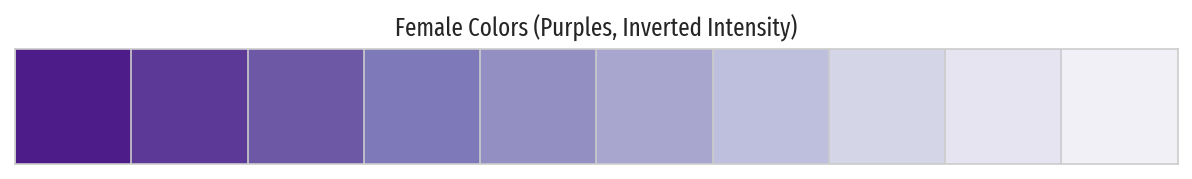

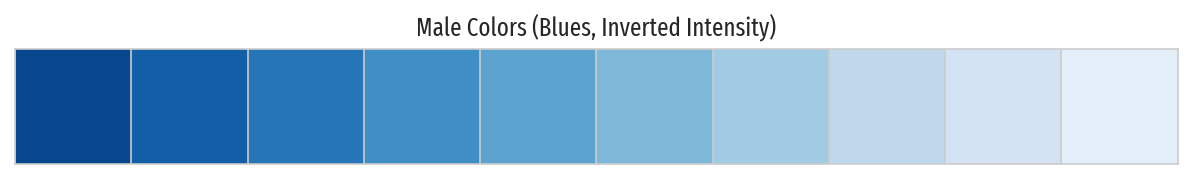

In [27]:
# Visualizar la paleta de colores para mujeres
sns.palplot(female_colors)
plt.title("Female Colors (Purples, Inverted Intensity)")
plt.show()

# Visualizar la paleta de colores para hombres
sns.palplot(male_colors)
plt.title("Male Colors (Blues, Inverted Intensity)")
plt.show()

Visualizamos

In [46]:
# Crear un nuevo DataFrame con los datos necesarios para stackplot
stack_df = pd.DataFrame(index=tabla_anual_normalizada.index)
for nombre in tabla_anual_normalizada.columns:
    stack_df[nombre] = tabla_anual_normalizada[nombre].values

# Preparar los colores para stackplot
stack_colors = []
for nombre in stack_df.columns:
    stack_colors.append(color_mapping[nombre])

stack_df

Maria       Ana      Rosa  Patricia   Claudia  Carolina    Camila  \
anio                                                                         
1920  0.336774  0.050868  0.063734  0.000000  0.000000  0.003291  0.000598   
1921  0.286378  0.045734  0.054567  0.000065  0.000065  0.001047  0.000262   
1922  0.280698  0.047708  0.055316  0.000125  0.000125  0.001497  0.000249   
1923  0.275493  0.042164  0.054697  0.000365  0.000061  0.001825  0.000122   
1924  0.276544  0.043839  0.051575  0.000112  0.000112  0.001570  0.000392   
...        ...       ...       ...       ...       ...       ...       ...   
2016  0.118475  0.009804  0.002848  0.003013  0.004491  0.008216  0.038834   
2017  0.114117  0.011166  0.002761  0.002025  0.005215  0.008467  0.031413   
2018  0.114919  0.014406  0.002960  0.002631  0.005526  0.007762  0.030917   
2019  0.114756  0.016910  0.003107  0.002312  0.005998  0.007877  0.034759   
2020  0.120164  0.017920  0.004187  0.002010  0.004522  0.006532  0.033495   

      Catalina   Javiera     Sofia      Jose      Juan      Luis    Carlos  \
anio                                                                         
1920  0.002394  0.000598  0.005087  0.159336  0.095153  0.094405  0.041741   
1921  0.002944  0.000393  0.003926  0.171945  0.109919  0.103769  0.049267   
1922  0.002120  0.000624  0.003492  0.171500  0.109323  0.105582  0.046523   
1923  0.001825  0.000426  0.003651  0.166890  0.116147  0.112679  0.048248   
1924  0.002355  0.000280  0.003588  0.167788  0.113970  0.110551  0.047819   
...        ...       ...       ...       ...       ...       ...       ...   
2016  0.095744  0.061565  0.218820  0.099304  0.070986  0.038725  0.032809   
2017  0.094116  0.055709  0.220627  0.104055  0.077858  0.043806  0.033499   
2018  0.093672  0.053677  0.209117  0.115182  0.075845  0.041245  0.036640   
2019  0.089319  0.050585  0.222286  0.104928  0.073710  0.042419  0.033675   
2020  0.092112  0.046056  0.219226  0.107855  0.075448  0.042037  0.034751   

         Jorge    Manuel  Francisco    Victor  Cristian     Pedro  
anio                                                               
1920  0.016158  0.048773   0.022591  0.018103  0.000150  0.040245  
1921  0.024535  0.055156   0.024274  0.021264  0.000000  0.044491  
1922  0.030496  0.057686   0.021952  0.023012  0.000125  0.041846  
1923  0.028170  0.059808   0.023546  0.022025  0.000122  0.041738  
1924  0.030945  0.058415   0.024106  0.023826  0.000000  0.042213  
...        ...       ...        ...       ...       ...       ...  
2016  0.029030  0.024867   0.049022  0.023443  0.031166  0.038834  
2017  0.027670  0.023130   0.044788  0.021535  0.028039  0.050003  
2018  0.026707  0.023352   0.043547  0.021773  0.025720  0.054401  
2019  0.026955  0.024425   0.040757  0.021752  0.027605  0.055861  
2020  0.025289  0.025708   0.040111  0.022944  0.025038  0.054597  

[101 rows x 20 columns]

In [47]:
stack_colors

[(0.30648212226066895, 0.11035755478662054, 0.5411303344867359),
 (0.36764321414840445, 0.22592848904267587, 0.5955401768550557),
 (0.4298961937716263, 0.3460668973471741, 0.6540715109573241),
 (0.4948558246828143, 0.47598615916955017, 0.7219838523644752),
 (0.5771626297577854, 0.5628911956939638, 0.7645059592464436),
 (0.6620530565167244, 0.653440984236832, 0.8126105344098424),
 (0.7469434832756633, 0.7505420991926183, 0.8675893886966551),
 (0.8355247981545559, 0.8361707035755478, 0.9118800461361014),
 (0.9007612456747405, 0.8963936947327951, 0.9434063821607074),
 (0.951449442522107, 0.9446981930026913, 0.969519415609381),
 (0.03137254901960784, 0.28161476355247983, 0.5582622068435218),
 (0.07481737793156479, 0.3732564398308343, 0.6552095347943099),
 (0.15072664359861593, 0.4644521337946943, 0.7207843137254902),
 (0.24816608996539793, 0.5618915801614763, 0.7709803921568628),
 (0.36159938485198, 0.6427374086889658, 0.8165782391387928),
 (0.491764705882353, 0.7219684736639754, 0.8547789

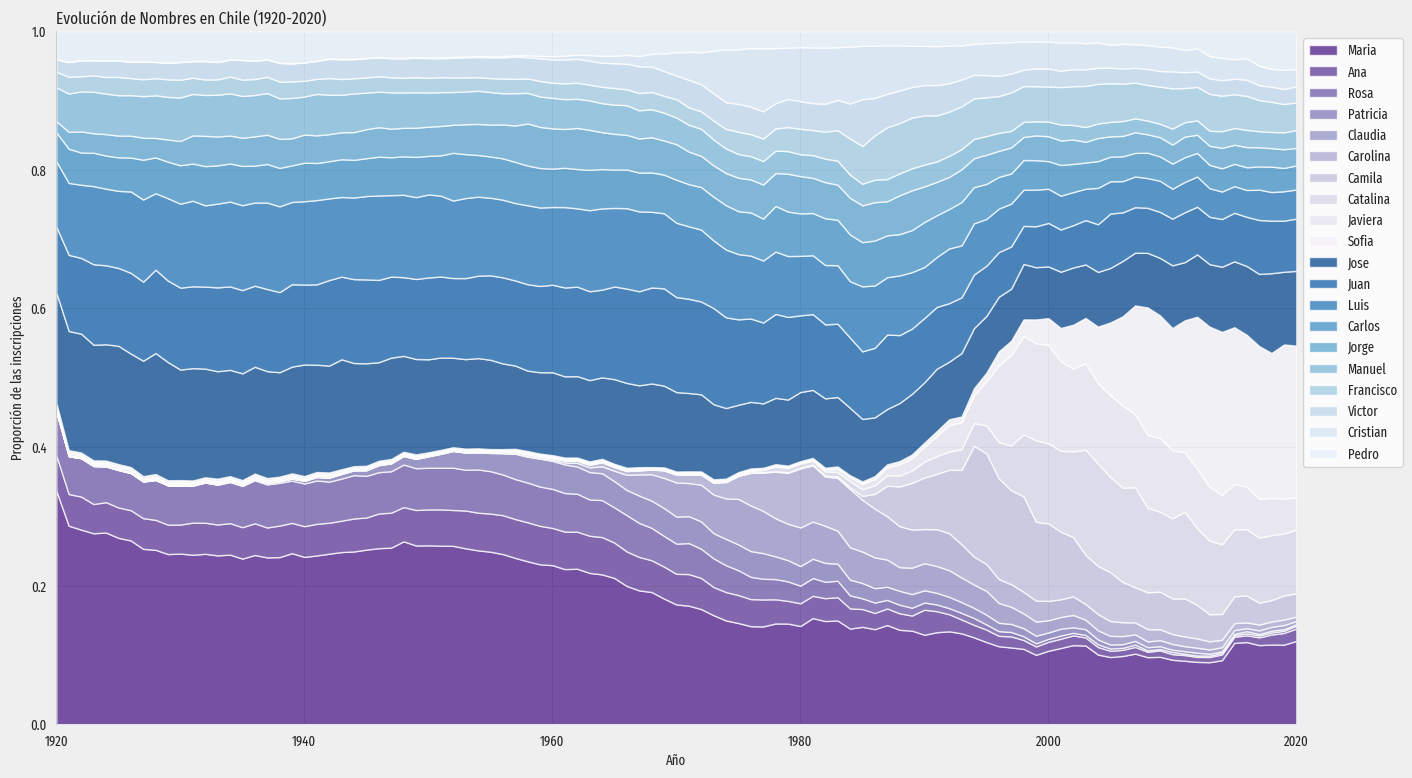

In [48]:
# Paso 7: Crear el gráfico de áreas apiladas con colores diferenciados por sexo
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)

# Establecer el color de fondo
fig.set_facecolor("#efefef")
ax.set_facecolor("#efefef")

# Configurar límites y etiquetas
ax.set_xlim([1920, 2020])
ax.set_ylim([0, 1])
ax.set_title("Evolución de Nombres en Chile (1920-2020)", loc="left")
ax.set_ylabel("Proporción de las inscripciones")
ax.set_xlabel("Año")


# Graficar las áreas apiladas con stackplot
ax.stackplot(stack_df.index, stack_df.T, labels=stack_df.columns, colors=stack_colors, alpha=0.75)

# Añadir leyenda
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Eliminar las espinas del gráfico
sns.despine(ax=ax, bottom=True, top=True)

# Mostrar el gráfico
plt.show()

# Areas Apiladas Interactivas

## Plotly Libraries: `plotly.express` and `plotly.graph_objects`

### `plotly.express`
`plotly.express` es una API de alto nivel que facilita la creación rápida de gráficos interactivos con menos líneas de código. Proporciona una forma fácil y concisa de crear gráficos complejos.

### `plotly.graph_objects`
es una API de bajo nivel que ofrece más control y flexibilidad sobre los gráficos. Permite crear gráficos personalizados definiendo cada componente del gráfico.

In [51]:
import plotly.express as px

# Crear un gráfico de dispersión simple
df = px.data.iris()  # Cargar datos de ejemplo


fig = px.scatter(
    df,
    x='sepal_width',
    y='sepal_length',
    color='species',
    title='Relación entre Ancho y Largo del Sépalo de las Especies de Iris',
    labels={
        'sepal_width': 'Ancho del Sépalo (cm)',
        'sepal_length': 'Largo del Sépalo (cm)',
        'species': 'Especies de Iris'
    }
)
fig.show()

In [52]:
import plotly.express as px
import plotly.graph_objects as go

# Suponiendo que ya tienes los datos en 'tabla_anual_norm', 'datos_populares', 'datos_1920_1970' y 'datos_1971_2020'

# Obtener los 10 nombres más populares sumando la frecuencia a lo largo de todos los años,
# ordenando en orden descendente y seleccionando los 10 primeros nombres.
nombres_mas_populares = tabla_anual_norm.sum(axis=0).sort_values(ascending=False).head(10).index

# Filtrar los datos originales para obtener solo los nombres más populares.
datos_populares = tabla_anual_norm[nombres_mas_populares]

# Dividir los datos en dos períodos: 1920-1970 y 1971-2020.
datos_1920_1970 = datos_populares.loc[1920:1970]
datos_1971_2020 = datos_populares.loc[1971:]

# Crear el gráfico interactivo para el período 1920-1970.
fig_1920_1970 = go.Figure()

# Agregar una traza al gráfico por cada nombre, configurando cada traza para ser parte del mismo grupo apilado.
for column in datos_1920_1970.columns:
    fig_1920_1970.add_trace(go.Scatter(
        x=datos_1920_1970.index,  # Eje x: años
        y=datos_1920_1970[column],  # Eje y: frecuencia del nombre
        mode='lines',  # Modo de trazado: líneas
        stackgroup='one',  # Establecer el grupo de apilamiento para crear un streamgraph
        name=column  # Nombre de la traza (nombre más popular)
    ))

# Actualizar el layout del gráfico con títulos y etiquetas de los ejes.
fig_1920_1970.update_layout(
    title='Nombres más populares en Chile (1920-1970)',  # Título del gráfico
    xaxis_title='Año',  # Título del eje x
    yaxis_title='Frecuencia'  # Título del eje y
)

# Mostrar el gráfico interactivo para el período 1920-1970.
fig_1920_1970.show()

# Crear el gráfico interactivo para el período 1971-2020.
fig_1971_2020 = go.Figure()

# Agregar una traza al gráfico por cada nombre, configurando cada traza para ser parte del mismo grupo apilado.
for column in datos_1971_2020.columns:
    fig_1971_2020.add_trace(go.Scatter(
        x=datos_1971_2020.index,  # Eje x: años
        y=datos_1971_2020[column],  # Eje y: frecuencia del nombre
        mode='lines',  # Modo de trazado: líneas
        stackgroup='one',  # Establecer el grupo de apilamiento para crear un streamgraph
        name=column  # Nombre de la traza (nombre más popular)
    ))

# Actualizar el layout del gráfico con títulos y etiquetas de los ejes.
fig_1971_2020.update_layout(
    title='Nombres más populares en Chile (1971-2020)',  # Título del gráfico
    xaxis_title='Año',  # Título del eje x
    yaxis_title='Frecuencia'  # Título del eje y
)

# Mostrar el gráfico interactivo para el período 1971-2020.
fig_1971_2020.show()


# Word Cloud

Un gráfico de nube de palabras, o "word cloud", es una representación visual de datos textuales en la que las palabras individuales se muestran con diferentes tamaños, colores y orientaciones. La principal característica de un word cloud es que el tamaño de cada palabra está relacionado con su frecuencia o importancia en el conjunto de datos: palabras que aparecen con mayor frecuencia en el texto de origen se muestran más grandes.

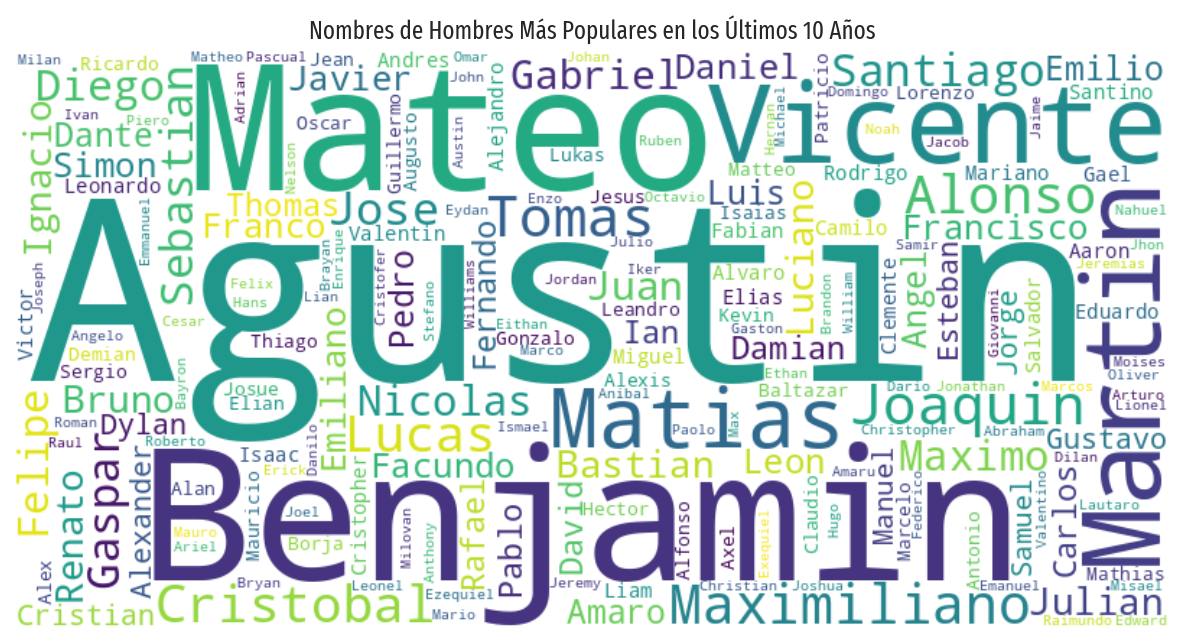

In [30]:
from wordcloud import WordCloud

# Suponiendo que 'guaguas' es el DataFrame original con las columnas ['nombre', 'sexo', 'anio', 'n']

# Paso 1: Filtrar los datos para los últimos diez años
ultimo_anio = guaguas['anio'].max()
ultimos_diez_anios = guaguas[guaguas['anio'] >= (ultimo_anio - 9)]

# Paso 2: Filtrar los nombres de hombres
hombres_ultimos_diez_anios = ultimos_diez_anios[ultimos_diez_anios['sexo'] == 'M']

# Paso 3: Contar la frecuencia de los nombres
frecuencia_nombres_hombres = hombres_ultimos_diez_anios.groupby('nombre')['n'].sum().sort_values(ascending=False)

# Paso 4: Generar una nube de palabras con los nombres más frecuentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_nombres_hombres)

# Paso 5: Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nombres de Hombres Más Populares en los Últimos 10 Años")
plt.show()


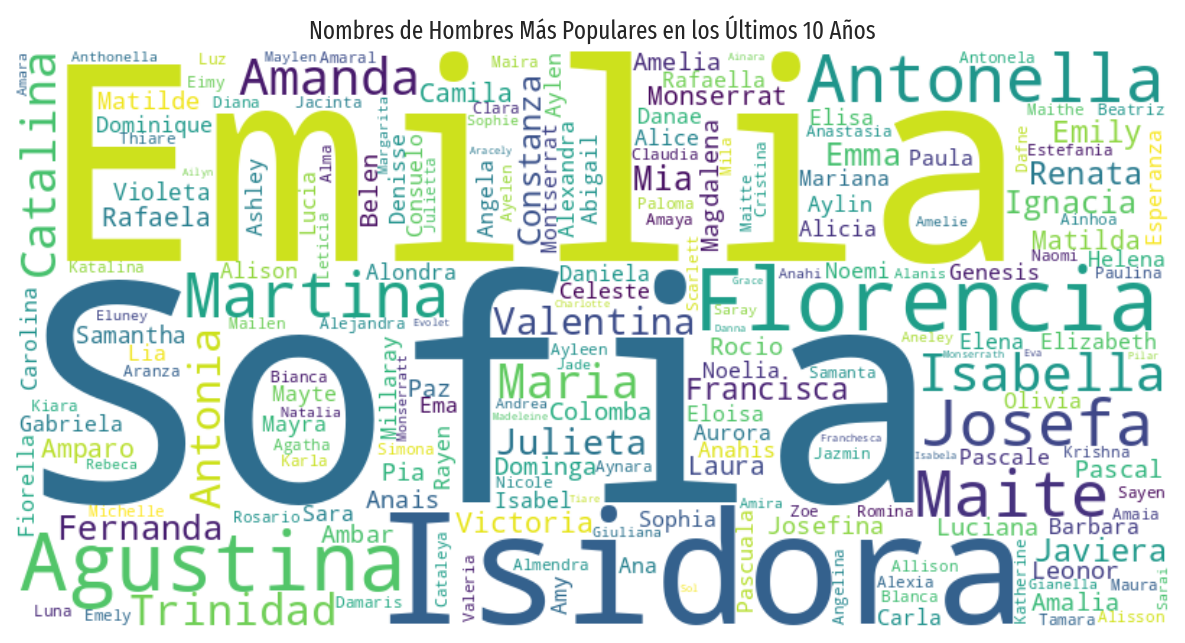

In [31]:
from wordcloud import WordCloud

# Suponiendo que 'guaguas' es el DataFrame original con las columnas ['nombre', 'sexo', 'anio', 'n']

# Paso 1: Filtrar los datos para los últimos diez años
ultimo_anio = guaguas['anio'].max()
ultimos_diez_anios = guaguas[guaguas['anio'] >= (ultimo_anio - 9)]

# Paso 2: Filtrar los nombres de hombres
hombres_ultimos_diez_anios = ultimos_diez_anios[ultimos_diez_anios['sexo'] == 'F']

# Paso 3: Contar la frecuencia de los nombres
frecuencia_nombres_hombres = hombres_ultimos_diez_anios.groupby('nombre')['n'].sum().sort_values(ascending=False)

# Paso 4: Generar una nube de palabras con los nombres más frecuentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_nombres_hombres)

# Paso 5: Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nombres de Hombres Más Populares en los Últimos 10 Años")
plt.show()

# Bubble Plots

In [32]:
# Crear una tabla pivote
tabla_pivote = pd.pivot_table(guaguas, index="nombre", columns="sexo", values="n", aggfunc="sum")

# Unir con total_n y rellenar NaN con 0
tabla_completa = tabla_pivote.join(total_n).fillna(0)


tabla_completa

F    M  n
nombre                
'Akurenga  0.0  1.0  1
'Amakihi   1.0  0.0  1
'Annia     1.0  0.0  1
'Ihan      0.0  1.0  1
'Ohana     1.0  0.0  1
...        ...  ... ..
Zyra       2.0  0.0  2
Zyrack     0.0  1.0  1
Zyrce      1.0  0.0  1
Zyrhi      1.0  0.0  1
Zysli      1.0  0.0  1

[186295 rows x 3 columns]

In [33]:
# Calcular la multiplicación de F y M y filtrar nombres unisex
tabla_completa["mult"] = tabla_completa["F"] * tabla_completa["M"]
tabla_completa

F    M  n  mult
nombre                      
'Akurenga  0.0  1.0  1   0.0
'Amakihi   1.0  0.0  1   0.0
'Annia     1.0  0.0  1   0.0
'Ihan      0.0  1.0  1   0.0
'Ohana     1.0  0.0  1   0.0
...        ...  ... ..   ...
Zyra       2.0  0.0  2   0.0
Zyrack     0.0  1.0  1   0.0
Zyrce      1.0  0.0  1   0.0
Zyrhi      1.0  0.0  1   0.0
Zysli      1.0  0.0  1   0.0

[186295 rows x 4 columns]

In [34]:
unisex_names = tabla_completa[(tabla_completa["mult"] > 0) & (tabla_completa["n"] > 50)]
unisex_names

F       M     n     mult
nombre                                  
Aaron         1.0  8607.0  8608   8607.0
Abby        439.0     3.0   442   1317.0
Abdel         1.0    88.0    89     88.0
Abdias        1.0   308.0   309    308.0
Abdiel        1.0   821.0   822    821.0
...           ...     ...   ...      ...
Zi           34.0    37.0    71   1258.0
Zoe        1329.0    15.0  1344  19935.0
Zoilo         1.0   503.0   504    503.0
Zorobabel     2.0   100.0   102    200.0
Zunilda    7107.0     2.0  7109  14214.0

[1881 rows x 4 columns]

In [35]:
# Eliminar columnas innecesarias y normalizar las filas
unisex_names = unisex_names.drop(["mult","n"], axis=1)
unisex_names = normalize_rows(unisex_names)

unisex_names

F         M
nombre                       
Aaron      0.000116  0.999884
Abby       0.993213  0.006787
Abdel      0.011236  0.988764
Abdias     0.003236  0.996764
Abdiel     0.001217  0.998783
...             ...       ...
Zi         0.478873  0.521127
Zoe        0.988839  0.011161
Zoilo      0.001984  0.998016
Zorobabel  0.019608  0.980392
Zunilda    0.999719  0.000281

[1881 rows x 2 columns]

In [36]:
# Filtrar nombres unisex con proporción de F entre 0.02 y 0.98
unisex_names = unisex_names[unisex_names["F"].between(0.02, 0.98)]

# Uno la columna n de nuevo
unisex_names = unisex_names.join(total_n)

# Ordenar y mostrar los 15 nombres unisex más comunes
unisex_names = unisex_names.sort_values('n', ascending=False)

# Mostrar el resultado
unisex_names

F         M      n
nombre                            
Jesus    0.046455  0.953545  18534
Rosario  0.962169  0.037831  14142
Carol    0.978415  0.021585  11119
Pascal   0.959082  0.040918   8456
Karin    0.979934  0.020066   7874
...           ...       ...    ...
Mily     0.960784  0.039216     51
Ain      0.607843  0.392157     51
Anwar    0.058824  0.941176     51
Mell     0.960784  0.039216     51
Merly    0.941176  0.058824     51

[621 rows x 3 columns]

<Axes: ylabel='Frequency'>

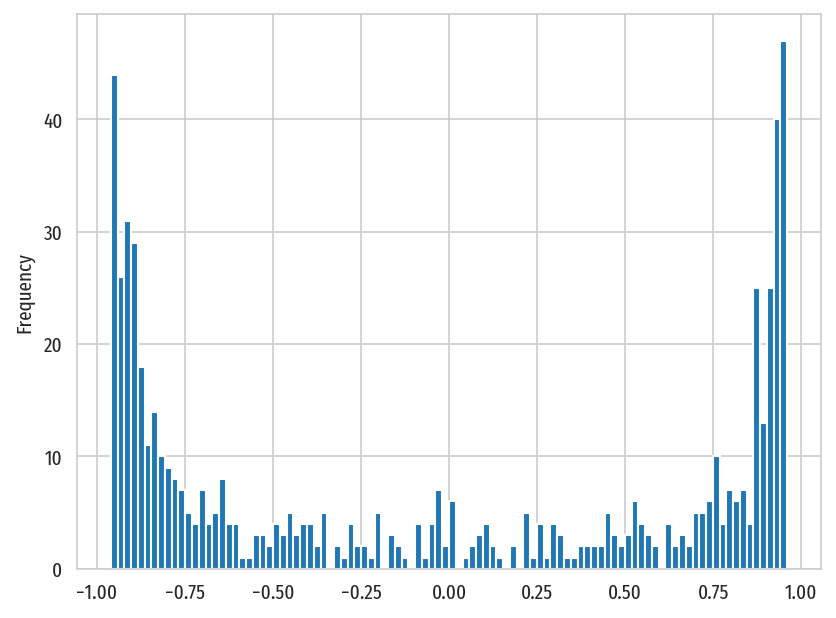

In [37]:
unisex_names["tendency"] = unisex_names["F"] - unisex_names["M"]
unisex_names["tendency"].plot(kind="hist", bins=100)


In [38]:
!pip3 install KDEpy
!pip3 install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.4/553.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 26.8 MB/s eta 0:00:00


In [39]:
!pip install pymunk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.1 MB/s eta 0:00:00


In [40]:
from miniaves import bubble_plot

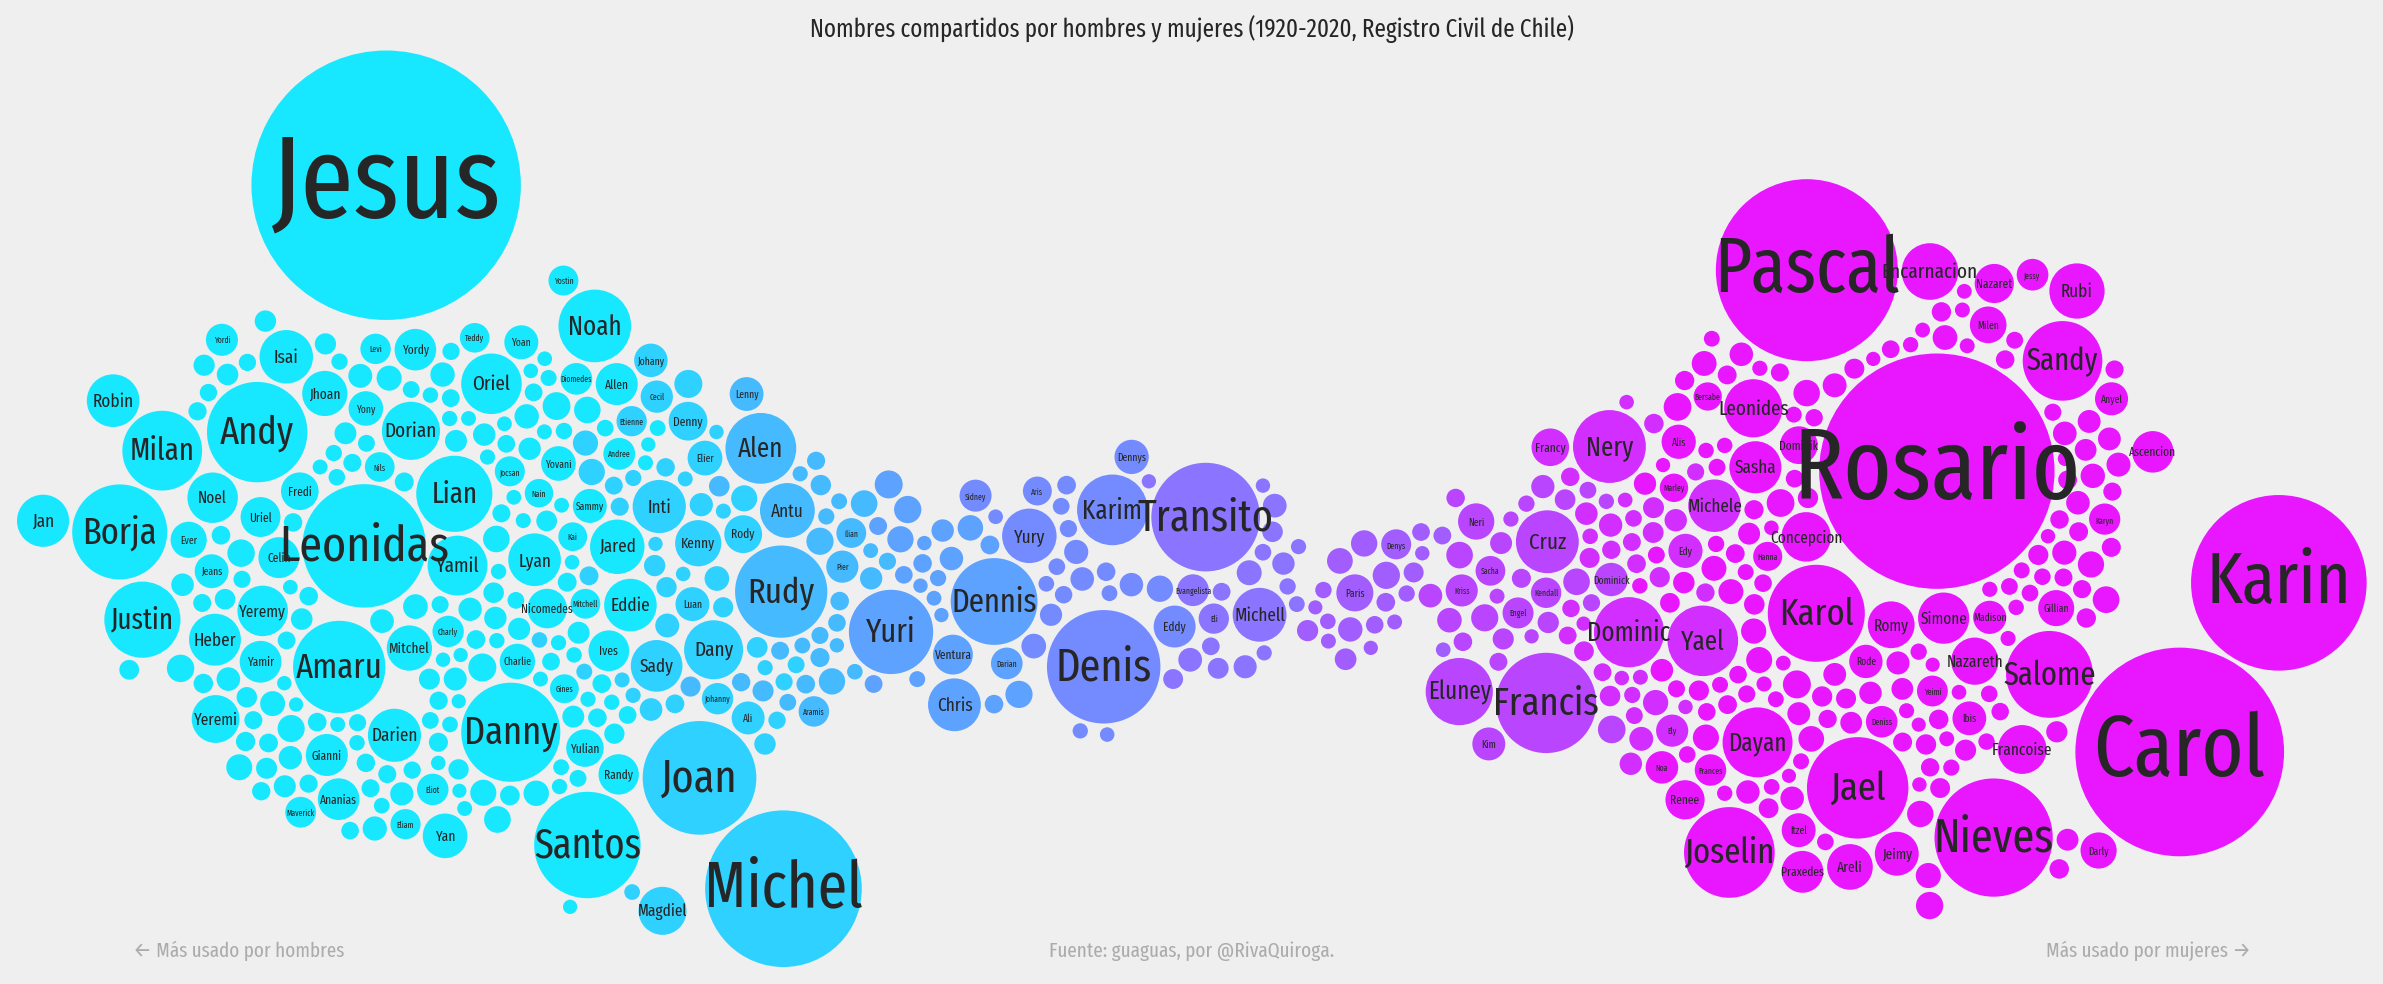

In [41]:
fig, ax = plt.subplots(figsize=(16, 9))

bubble_plot(ax,unisex_names.reset_index(),"tendency","n",label_column="nombre",palette="cool",max_label_size=56,starting_y_range=60, margin=2)

ax.set_axis_off()
ax.set_title("Nombres compartidos por hombres y mujeres (1920-2020, Registro Civil de Chile)")

ax.annotate("Más usado por mujeres →",(0.95, 0.01), xycoords="axes fraction",ha="right", va="bottom",fontsize="medium",color="#abacab")

ax.annotate("← Más usado por hombres",(0.05, 0.01), xycoords="axes fraction",ha="left",va="bottom",fontsize="medium",color="#abacab")
ax.annotate("Fuente: guaguas, por @RivaQuiroga.",(0.5, 0.01),xycoords="axes fraction",ha="center",va="bottom",fontsize="medium",color="#abacab")

fig.set_facecolor("#efefef")
fig.tight_layout()


# Actividad: Comparación de Décadas y Género en Streamgraphs

Comparar dos décadas específicas y los datos por género, generando gráficos para explorar y visualizar estas comparaciones.

**Instrucciones:**

*Seleccionar Décadas:*

- Escoge dos décadas específicas para comparar (por ejemplo, 1950-1960 y 1980-1990).
- Filtrar por Género:

- Filtra los datos para obtener los nombres más populares por género (masculino y femenino) para las décadas seleccionadas.

*Generar Gráficos:*

- Utiliza el código proporcionado para crear gráficos de streamgraph para cada combinación de década y género, y aplica el suavizado gaussiano. Elimina las etiquetas del eje. O crea una nube de palabras para cada decada por genero.

*Análisis de Resultados:*

- Interpreta los gráficos generados y describe cualquier patrón o tendencia observable.
- Compara los resultados entre las dos décadas seleccionadas y entre los géneros.